In [20]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from codigos import extract_features, cross_validation, grid_search, preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
path = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo3"

## Vggnet16

In [7]:
x_train_vggnet, y_train_vggnet, x_test_vggnet, y_test_vggnet = extract_features.features_vgg16(path)

******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16
******************************************************************** 
Labels: ['normal' 'retinopatia']
Labels encoded: [0 1]
6/6 [==============================] - 17s 3s/step
******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16 finalizada
******************************************************************** 


In [16]:
models_cv = cross_validation.compare_models(x_train_vggnet, y_train_vggnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [17]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.795217,0.882282,0.714740,0.771205,0.866403
1,Naive Bayes,0.913936,0.854213,1.000000,0.921087,0.913937,0.677330,0.658712,0.739351,0.695234,0.678636
2,SVM,0.793026,0.874588,0.692102,0.768416,0.854404,0.757084,0.906724,0.572987,0.694239,0.812362
3,LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,0.777084,0.833185,0.729156,0.761185,0.842197
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.795184,0.841792,0.750974,0.780388,0.848017


In [24]:
muestras_en_intervalo = 50
n_iter = 100

learning_ra_0 = list(set([float(x) for x in np.linspace(start = 0.001, stop = 0.8, num = muestras_en_intervalo)]))
estimadores_0 = list(set([int(x) for x in np.linspace(start = 10, stop = 200, num = muestras_en_intervalo)]))
profundidad_0 = list(set([int(x) for x in np.linspace(start = 11,  stop = 50, num = muestras_en_intervalo)]))
min_data_le_0 = list(set([int(x) for x in np.linspace(start = 18,  stop = 0.5*x_train_vggnet.shape[0], num = muestras_en_intervalo)]))

parametros = {'learning_ra': learning_ra_0,
              'estimadores': estimadores_0,
              'profundidad': profundidad_0,
              'min_data_le': min_data_le_0
             }

In [25]:
ronda_0 = grid_search.train_models(x_train_vggnet, y_train_vggnet, x_test_vggnet, y_test_vggnet, n_iter, parametros)

******************************************************************** 
Iniciando busqueda de hiperparametros
******************************************************************** 
******************************************************************** 
Iteración: 0
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=260, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=260
[LightGBM] [Warning] min_data_in_leaf is set=270, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=270
[LightGBM] [Warning] min_data_in_leaf is set=218, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=218
[LightGBM] [Warning] min_data_in_leaf is set=112, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=112
[LightGBM] [Warning] min_data_in_leaf is set=144, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=144
[LightGBM] [Warning] min_data_in_leaf is set=270,

[LightGBM] [Warning] min_data_in_leaf is set=254, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=254
[LightGBM] [Warning] min_data_in_leaf is set=165, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=165
******************************************************************** 
Iteración: 60
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=244, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=244
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] min_data_in_leaf is set=260, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=260
[LightGBM] [Warning] min_data_in_leaf is set=191, min_child_samples=20 will be ignored. Current value: min

In [26]:
ronda_0.to_excel("Modelo3/ronda_0.xlsx")

In [27]:
data = pd.read_excel("Modelo3/ronda_0.xlsx")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

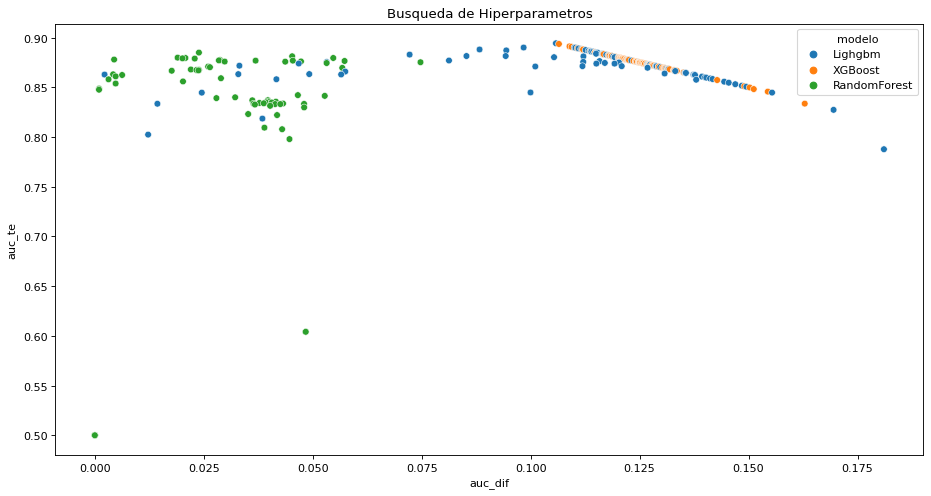

In [31]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data, x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

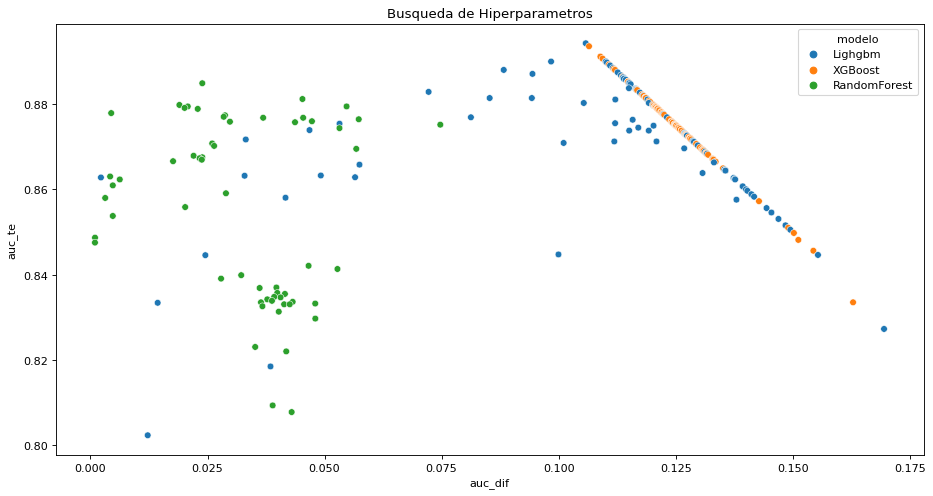

In [32]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data[data["auc_te"]>=0.8], x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

In [33]:
muestras_en_intervalo = 50
n_iter = 100

learning_ra_0 = list(set([float(x) for x in np.linspace(start = 0.001, stop = 0.8, num = muestras_en_intervalo)]))
estimadores_0 = list(set([int(x) for x in np.linspace(start = 33, stop = 196, num = muestras_en_intervalo)]))
profundidad_0 = list(set([int(x) for x in np.linspace(start = 19,  stop = 44, num = muestras_en_intervalo)]))
min_data_le_0 = list(set([int(x) for x in np.linspace(start = 54,  stop = 102, num = muestras_en_intervalo)]))

parametros = {'learning_ra': learning_ra_0,
              'estimadores': estimadores_0,
              'profundidad': profundidad_0,
              'min_data_le': min_data_le_0
             }

In [34]:
ronda_1 = grid_search.train_models(x_train_vggnet, y_train_vggnet, x_test_vggnet, y_test_vggnet, n_iter, parametros)

******************************************************************** 
Iniciando busqueda de hiperparametros
******************************************************************** 
******************************************************************** 
Iteración: 0
******************************************************************** 
******************************************************************** 
Iteración: 10
******************************************************************** 
******************************************************************** 
Iteración: 20
******************************************************************** 
******************************************************************** 
Iteración: 30
******************************************************************** 
******************************************************************** 
Iteración: 40
******************************************************************** 
*****************************************************

In [35]:
ronda_1.to_excel("Modelo3/ronda_1.xlsx")

In [36]:
data = pd.read_excel("Modelo3/ronda_1.xlsx")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

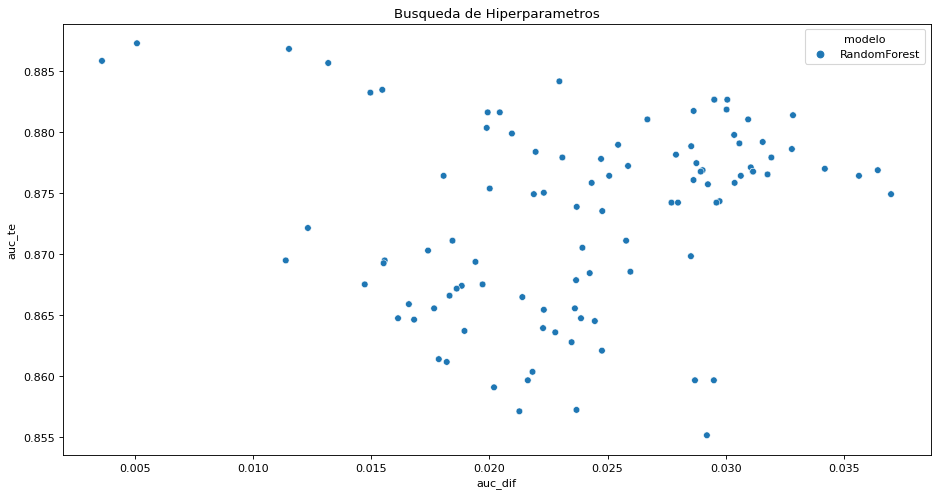

In [37]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data, x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

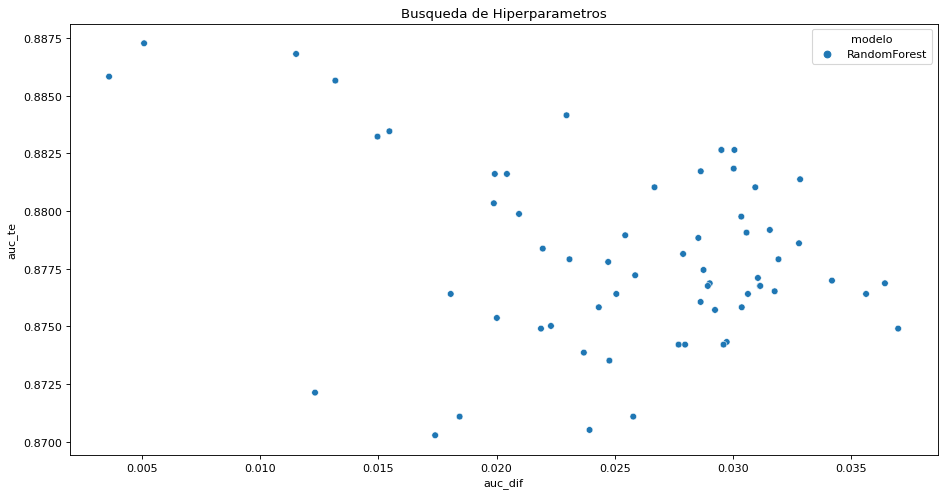

In [40]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data[data["auc_te"]>=0.87], x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

## Resnet 

In [10]:
x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet = extract_features.features_resnet(path)

******************************************************************** 
Extracción de caracteristicas por medio de RESNET
******************************************************************** 
Labels: ['normal' 'retinopatia']
Labels encoded: [0 1]
******************************************************************** 
Extracción de caracteristicas por medio de RESNET finalizada
******************************************************************** 


In [18]:
models_cv = cross_validation.compare_models(x_train_resnet, y_train_resnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [19]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.751695,0.819185,0.649091,0.719037,0.781263
1,Naive Bayes,0.772196,0.804162,0.723719,0.760589,0.844277,0.700819,0.728857,0.641753,0.679569,0.758617
2,SVM,0.831515,0.896998,0.750029,0.816590,0.917250,0.746143,0.834487,0.626948,0.710759,0.806842
3,LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,0.739001,0.784476,0.696299,0.726973,0.818976
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.751695,0.801264,0.700065,0.735313,0.809328
